# LetsGrowMore Data Science Virtual Internship

Name = Rupak Dey
Level 02 =  Intermediate
Task 02 = Prediction Using Decision Tree

# Importing the libraries

In [129]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [130]:
df = pd.read_csv("iris.csv")

In [131]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [132]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [ ]:
#Label encoding the target variable categories

In [133]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['species']= label_encoder.fit_transform(df['Species'])
  
df['species'].unique()

array([0, 1, 2])

In [10]:
df.drop(['species'],axis=1,inplace=True)

In [154]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [135]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
species          0
dtype: int64

# Visualising the sepal and petal dimensions

In [136]:
sns.set_style("darkgrid")

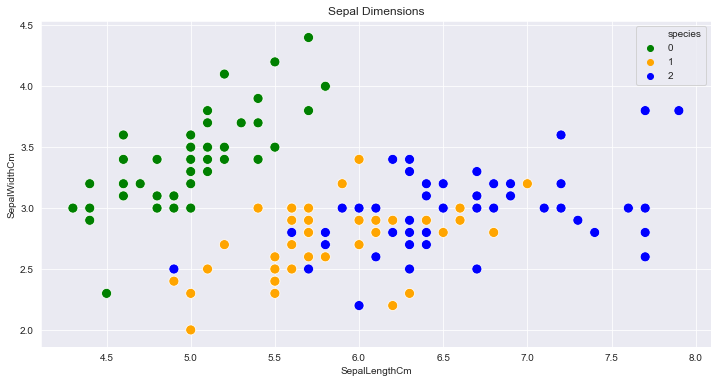

In [137]:
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')

sns.scatterplot(x=df["SepalLengthCm"], 
                y=df["SepalWidthCm"], 
                hue=df["species"],palette = ["green","orange","blue"],
                s=100);

The plt gives information the species "0" has small sepal length and large sepal width and where species "2" has large sepal length and small sepal width.

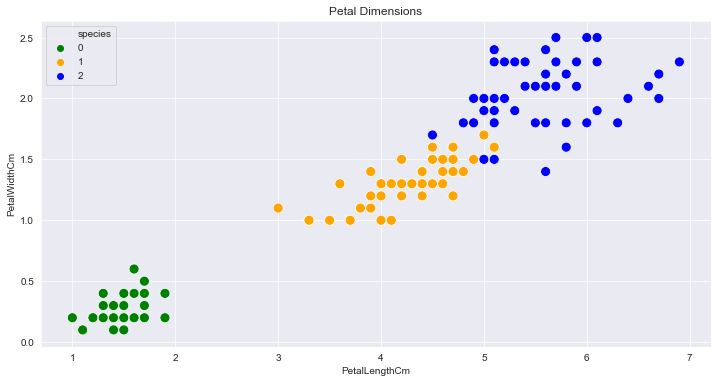

In [138]:
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(x=df["PetalLengthCm"], 
                y=df["PetalWidthCm"], 
                hue=df["species"],palette = ["green","orange","blue"],
                s=100);


Here species "0" has small petal length and petal width while opposite holds true for species "2". It can be observed that there is linear relationship between petal length and petal width for all species.

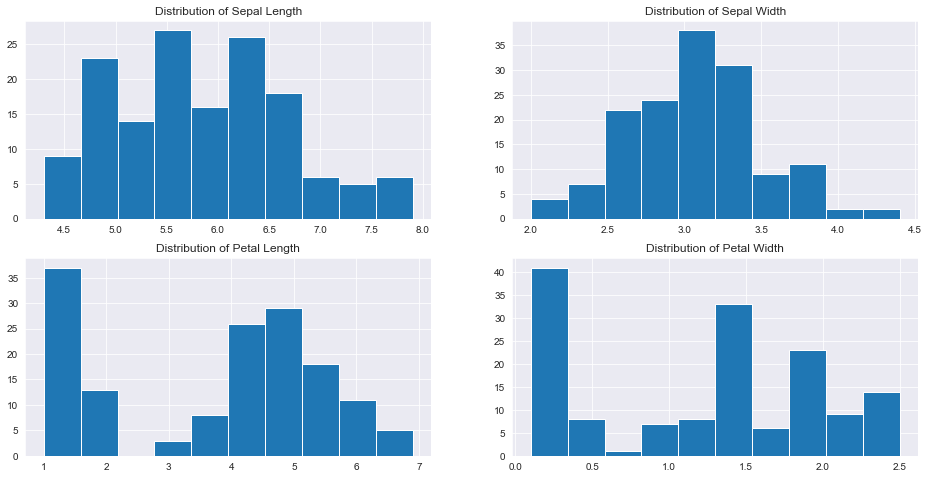

In [139]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#plot for sepal length
axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(df["SepalLengthCm"]);

#plot for sepal width
axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(df["SepalWidthCm"]);

#plot for petal length
axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(df["PetalLengthCm"]); 

#plot for petal width
axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(df["PetalWidthCm"]);

It isobserved that sepal width follows normal distribution, while sepal length is lightly right skewed.

# Analysing correlation between feature and Target

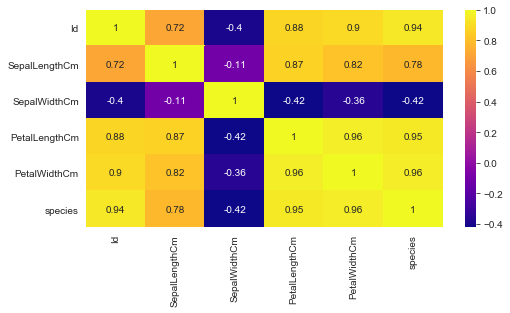

In [140]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='plasma');


The plot insightes that Petal width and length are highly correlated, while the sepal length and width are not correlated.

# Splitting The Data into Training And Testing Dataset

In [141]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)

In [142]:
train.shape, test.shape

((120, 7), (30, 7))

In [143]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'species'],
      dtype='object')

In [144]:
train_x = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
train_y = train.species
test_x = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
test_y = test.species

In [145]:
dtree = DecisionTreeClassifier()
dtree.fit(train_x,train_y)
predictions = dtree.predict(test_x)
print("The accuracy of Decision Tree is:", metrics.accuracy_score(predictions, test_y))

The accuracy of Decision Tree is: 0.9333333333333333


In [146]:
prob = dtree.predict([[6.7,3.0,5.2,2.3]])

In [147]:
prob

array([2])

In [148]:
label_encoder.inverse_transform(prob)

array(['Iris-virginica'], dtype=object)

# Creation of decision tree classifier and visualising it graphically

In [149]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
Y = df.species

In [150]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(X,Y)
print("Decision Tree Classifier is created")

Decision Tree Classifier is created


In [151]:
feature_names=list(df.columns)
class_names = df['Species'].unique()
class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [152]:
from sklearn import tree

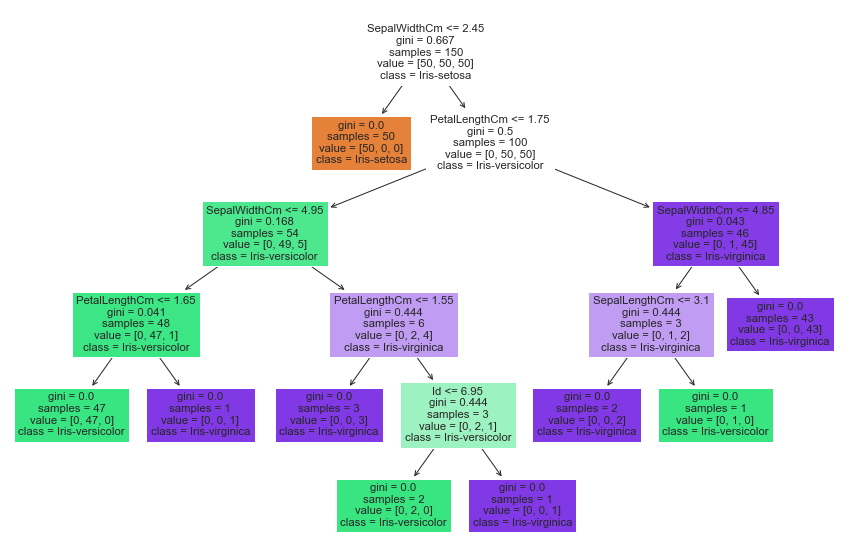

In [153]:
plt.figure(figsize = (15,10))
_ = tree.plot_tree(dtree1,feature_names=feature_names,class_names=class_names,filled=True)